## Pandas Checkpoint

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from disney_plus.csv into a pandas DataFrame.

In [4]:
disney_df = pd.read_csv('../data/disney_plus.csv')
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


### 1. Create a new dataframe named "movies_df" consisting of only movies.

In [6]:
movies_df = disney_df[disney_df['type'] == 'Movie'].copy()
movies_df['type'].unique()

array(['Movie'], dtype=object)

### 2. Create a new dataframe named "movie_ratings" from movies_df that consists of the top 5 ratings by count. This dataframe should consist of only two columns, rating and count.


In [8]:
movie_ratings = movies_df['rating'].value_counts().head(5).reset_index().copy()
print(movie_ratings)

  rating  count
0      G    235
1     PG    226
2   TV-G    224
3  TV-PG    165
4  PG-13     60


### 3. Use the movie_ratings dataframe to create a bar chart showing count of the top 5 ratings.


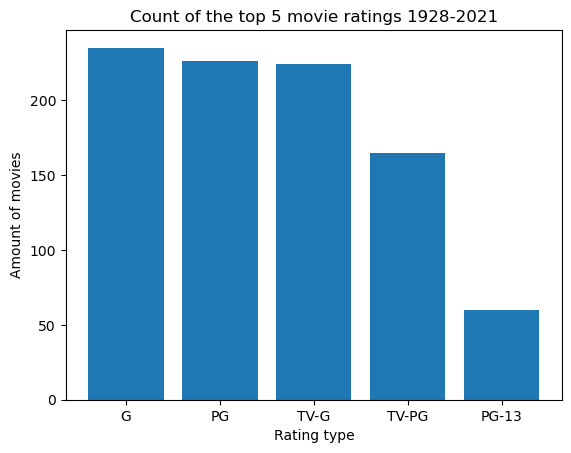

In [10]:
y_pos = np.arange(len(movie_ratings))

plt.bar(y_pos, movie_ratings['count'])

plt.xticks(y_pos, movie_ratings['rating'])

plt.title("Count of the top 5 movie ratings 1928-2021")
plt.xlabel("Rating type")
plt.ylabel("Amount of movies")

plt.show()

### 4. Using the movies_df, subset the data to create a new dataframe named "year_duration" that only consists of 2 columns, release_year and duration.


In [12]:
year_duration = movies_df[['release_year', 'duration']].copy()
year_duration.head(5)

,release_year,duration
0,2021,88 min
1,2011,93 min
2,2014,127 min
6,2009,106 min
7,2021,22 min


### 5. Find min, max, and average duration of movies from the 1975-1984.


In [14]:
def get_minutes(x):
    return int(x.split(' ')[0])

year_duration['duration_minutes'] = year_duration['duration'].apply(get_minutes)
year_duration.head()

,release_year,duration,duration_minutes
0,2021,88 min,88
1,2011,93 min,93
2,2014,127 min,127
6,2009,106 min,106
7,2021,22 min,22


In [15]:
min_duration_1975_1984 = year_duration['duration_minutes'][(year_duration['release_year'] > 1974) & (year_duration['release_year'] < 1985)].min()
max_duration_1975_1984 = year_duration['duration_minutes'][(year_duration['release_year'] > 1974) & (year_duration['release_year'] < 1985)].max()
avg_duration_1975_1984 = year_duration['duration_minutes'][(year_duration['release_year'] > 1974) & (year_duration['release_year'] < 1985)].mean()

print(f"Min duration of movies from the 1975-1984: {min_duration_1975_1984} min")
print(f"Max duration of movies from the 1975-1984: {max_duration_1975_1984} min")
print(f"Average duration of movies from the 1975-1984: {avg_duration_1975_1984:.2f} min")

Min duration of movies from the 1975-1984: 2 min
Max duration of movies from the 1975-1984: 135 min
Average duration of movies from the 1975-1984: 85.91 min


### 6. Create a scatterplot using year_duration that looks at movie durations over the years.  Do you notice any correlation from inspecting the scatterplot?


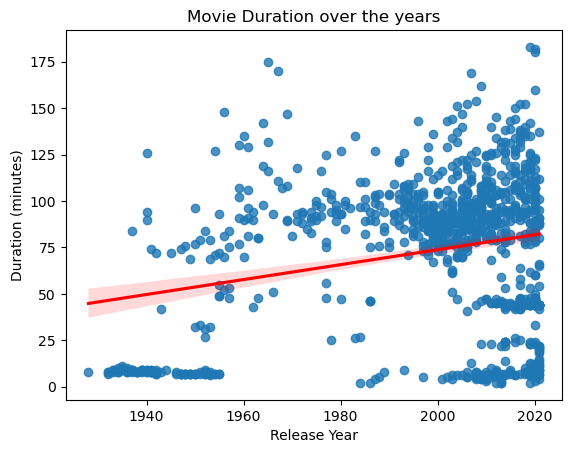

In [17]:
sns.regplot(x=year_duration["release_year"], y=year_duration["duration_minutes"], scatter=True, line_kws={"color": "red"})

plt.title("Movie Duration over the years")
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")

plt.show()

### 7. Find the actual correlation value, is there any correlation?


In [19]:
correlation = year_duration['release_year'].corr(year_duration['duration_minutes'])
print(f"Correlation between release year and movie duration: {correlation:.2f}")

Correlation between release year and movie duration: 0.24


### 8. Use movies_df to find which year had the most G-rated releases. Can you do this in a single line of code?


In [21]:
top_G_year = movies_df['release_year'][movies_df['rating'] == 'G'].value_counts().reset_index().head(1)

year = top_G_year['release_year'][0]
count = top_G_year['count'][0]

print(f"Year that had the most G-rated releases: {year} with {count} G-rated movies")

Year that had the most G-rated releases: 2003 with 12 G-rated movies


### 9. Which year had the most movie releases?  What percentage of movies that year had durations over 2 hours?


In [23]:
releases_per_year = year_duration['release_year'].value_counts().reset_index().head(1)

year = releases_per_year['release_year'][0]
count = releases_per_year['count'][0]

print(f"Year that had the most releases: {year} with {count} movies")

duration_top_1_releases = year_duration[year_duration['release_year'] == year]
prc_over_2_hours = len(duration_top_1_releases[duration_top_1_releases['duration_minutes'] > 120]) / len(duration_top_1_releases) * 100

print(f"Percentage of movies for {year} had durations over 2 hours: {prc_over_2_hours:.2f} %")

Year that had the most releases: 2020 with 72 movies
Percentage of movies for 2020 had durations over 2 hours: 6.94 %


### 10. Create a new column in movies_df that catagorizes each movie as either short, average, or long.  Short movies should be 30 mins or less, long movies should be over 2 hours.


In [25]:
movies_df['duration_minutes'] = movies_df['duration'].apply(get_minutes)
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,88


In [26]:
def duration_category(minutes):
    if minutes < 30:
        return 'short'
    elif minutes > 120:
        return 'long'
    else:
        return 'average'

movies_df['duration_category'] = movies_df['duration_minutes'].apply(duration_category)
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_category
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,88,average


### 11. Make a pie chart of the above movie lengths.


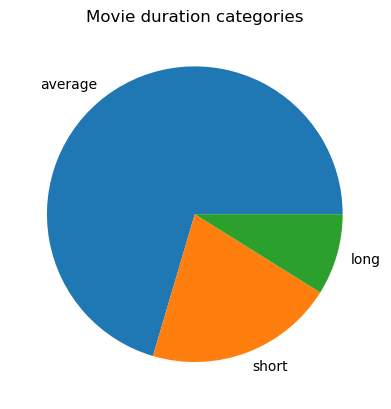

In [28]:
size_of_groups = movies_df['duration_category'].value_counts()

plt.pie(size_of_groups, labels=size_of_groups.index)
plt.title('Movie duration categories')

plt.show()

### 12. Which movie had the greatest gap from the year it was released to the year it was added?  What is the average number of years between release to being added?


In [30]:
movies_df['date_added'] = pd.to_datetime(movies_df['date_added'])

movies_df['added_year'] = movies_df['date_added'].dt.year
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_category,added_year
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,88,average,2021


In [31]:
movies_df['gap_release_to_added'] = movies_df['added_year'] - movies_df['release_year']
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_category,added_year,gap_release_to_added
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,88,average,2021,0


In [32]:
movie_with_greatest_gap = movies_df.sort_values('gap_release_to_added', ascending=False).reset_index().head(1)

title = movie_with_greatest_gap['title'][0]
gap = movie_with_greatest_gap['gap_release_to_added'][0]

print(f"Movie that had the greatest gap from the year it was released to the year it was added: \"{title}\" with gap {gap} years")

Movie that had the greatest gap from the year it was released to the year it was added: "Steamboat Willie" with gap 91 years


### 13. How many movies were added during the first year after the pandemic lockdown? (Assume the lockdown began on March 16, 2020)


In [34]:
movies_first_year_pandemic_df = movies_df[(movies_df['date_added'] > '2020-03-15') & (movies_df['date_added'] < '2021-03-17')].reset_index().copy()
movies_first_year_pandemic_df.head(1)

,index,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_category,added_year,gap_release_to_added
0,196,s197,Movie,Doc McStuffins: The Doc Is In,Chris Hamilton,"Laya DeLeon Hayes, Loretta Devine, Lara Jill M...",NaN,2021-03-12,2020,TV-Y,24 min,"Animation, Kids, Medical",Doc McStuffins helps kids learn about healthy ...,24,short,2021,1


In [35]:
num_movies_pandemic = len(movies_first_year_pandemic_df)
print(f"Movies were added during the first year after the pandemic lockdown: {num_movies_pandemic}")

Movies were added during the first year after the pandemic lockdown: 211


### 14. How many movies have been added on your birthday?


In [37]:
movies_my_full_birthday_df = movies_df[movies_df['date_added'] == '2003-05-11'].reset_index().copy()
num_movies_full_birthday = len(movies_my_full_birthday_df)
print(f"Movies were added when I was born: {num_movies_full_birthday} (2003-05-11)")

Movies were added when I was born: 0 (2003-05-11)


In [38]:
movies_df['month_day_added'] = movies_df['date_added'].dt.strftime('%m-%d')
movies_df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_minutes,duration_category,added_year,gap_release_to_added,month_day_added
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,2021-09-24,2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...,88,average,2021,0,09-24


In [39]:
movies_my_birthday_df = movies_df[movies_df['month_day_added'] == '05-11'].reset_index().copy()
num_movies_birthday = len(movies_my_birthday_df)
print(f"Movies were added on my birthday: {num_movies_birthday} (05-11)")

Movies were added on my birthday: 0 (05-11)


### 15. How many TV shows or Movies have the word 'dog' in the title regardless if it is capitalized?

In [41]:
dog_title_df = movies_df[movies_df['title'].str.lower().str.contains(r'\bdog\b')]
dog_title_num = len(dog_title_df)
print(f"Amount of TV shows or Movies that have the word \"dog\" in the title: {dog_title_num}")

Amount of TV shows or Movies that have the word "dog" in the title: 7
